In [16]:
import serial
import csv

# 設定串口參數
serial_port = 'COM4'  # 根據你的設備改變這個值
baud_rate = 9600
timeout = 2

# 建立串口連接
ser = serial.Serial(serial_port, baud_rate, timeout=timeout)

# 定義每個測量類型的CSV文件名稱
csv_files = {
    #'micr_micr': 'micr_micr.csv',
    #'micr_milli': 'micr_milli.csv',
    #'milli_micr': 'milli_micr.csv',
    'milli_milli': 'milli_milli.csv'
}

# 打開CSV文件以便寫入
file_handlers = {key: open(file, mode='w', newline='') for key, file in csv_files.items()}
csv_writers = {key: csv.writer(fh) for key, fh in file_handlers.items()}

for key in csv_writers:
    csv_writers[key].writerow([key])  # 寫入標題行

try:
    line_count = 0
    max_lines = 1000  # 設置最大接收行數

    while line_count < max_lines:
        # 從串口讀取一行數據
        line = ser.readline().decode('utf-8', errors='ignore').strip()
        if not line:
            continue

        print(f"接收到的行: {line}")  # 調試輸出接收到的數據行

        # 檢查和解析數據行
        for key in csv_writers.keys():
            if line.startswith(key + ':'):
                try:
                    error_value = float(line.split(':')[1].strip())
                    csv_writers[key].writerow([error_value])
                    print(f"更新 {key}: {error_value}")  # 調試輸出更新的數據
                    line_count += 1  # 增加計數器
                except (IndexError, ValueError) as e:
                    print(f"解析行時出錯: {line} ({e})")  # 調試輸出錯誤信息

except KeyboardInterrupt:
    pass  # 允許通過 Ctrl+C 退出

finally:
    ser.close()
    for fh in file_handlers.values():
        fh.close()
    print(f"資料收集已結束，共接收了 {line_count} 行數據。")


接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli_milli: 39.0625
更新 milli_milli: 39.0625
接收到的行: milli

In [17]:
import pandas as pd

# 定義各個CSV文件的路徑
file_paths = {
    'micr_micr': 'micr_micr.csv',
    'micr_milli': 'micr_milli.csv',
    'milli_micr': 'milli_micr.csv',
    'milli_milli': 'milli_milli.csv'
}

# 讀取每個CSV文件並將它們合併
data_frames = []

for key, path in file_paths.items():
    df = pd.read_csv(path)
    df.columns = [key]  # 設置列名為測量類型
    data_frames.append(df)

# 合併數據框
combined_df = pd.concat(data_frames, axis=1)

# 保存合併後的數據到新CSV文件
combined_df.to_csv('measurements.csv', index=False)

print("合併完成，結果已保存到 'measurements.csv'")


合併完成，結果已保存到 'measurements.csv'


In [48]:
import pandas as pd

# 定義各個CSV文件的路徑
file_paths = {
    'micr_micr_array_ADC': 'micr_micr_array_ADC.csv',
    'micr_micr_ADC': 'micr_micr_ADC.csv',
}

# 讀取每個CSV文件並將它們合併
data_frames = []

for key, path in file_paths.items():
    df = pd.read_csv(path)
    df.columns = [key]  # 設置列名為測量類型
    data_frames.append(df)

# 合併數據框
combined_df = pd.concat(data_frames, axis=1)

# 保存合併後的數據到新CSV文件
combined_df.to_csv('measurement.csv', index=False)

print("合併完成，結果已保存到 'measurement.csv'")


合併完成，結果已保存到 'measurement.csv'


![](圖片1.png)

In [49]:
df.corr()

,micr_micr_ADC
micr_micr_ADC,1.0


In [53]:
df = pd.read_csv('measurement.csv')
print(df.describe())

       micr_micr_array_ADC  micr_micr_ADC
count          1000.000000    1000.000000
mean            148.727000     148.641000
std               8.638118       8.312835
min             146.000000     146.000000
25%             147.000000     147.000000
50%             147.000000     147.000000
75%             148.000000     148.000000
max             405.000000     394.000000


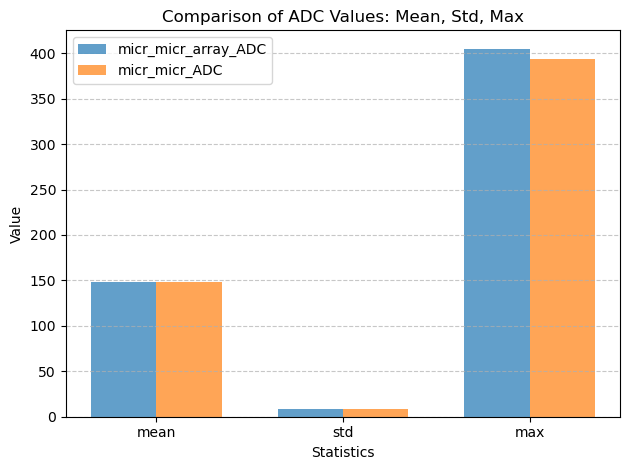

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 讀取 CSV 文件
df = pd.read_csv('measurement.csv')

# 計算每列數據的摘要統計量
stats = df.describe().loc[['mean', 'std', 'max']]

# 設置柱狀圖參數
labels = ['mean', 'std', 'max']
index = np.arange(len(labels))
bar_width = 0.35

# 繪製 micr_micr_array_ADC 的柱狀圖
plt.bar(index, stats['micr_micr_array_ADC'], bar_width, label='micr_micr_array_ADC', alpha=0.7)

# 繪製 micr_micr_ADC 的柱狀圖
plt.bar(index + bar_width, stats['micr_micr_ADC'], bar_width, label='micr_micr_ADC', alpha=0.7)

# 添加標題和標籤
plt.title('Comparison of ADC Values: Mean, Std, Max')
plt.xlabel('Statistics')
plt.ylabel('Value')

# 添加 x 軸的刻度標籤
plt.xticks(index + bar_width / 2, labels)

# 添加圖例
plt.legend()

# 添加網格以提高可讀性
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 調整佈局
plt.tight_layout()

# 顯示圖表
plt.show()


```mermaid
graph TD
    DIn[數位輸入] --> Decoder[數位解碼器]
    Decoder --> Amp[運算放大器]
    Amp --> DACOut[類比輸出]
    subgraph DAC_Circuit
        DIn
        Decoder
        Amp
        DACOut
    end
    GND[(GND)] --> DACOut
```